In [124]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
df=pd.read_csv('data/uec_data_2023_2025_full.csv')

## Regions

Map hospital to regions

In [125]:
hospital_to_region_dict = {
    "National":                       "National",
    "HSE Dublin and North East":           "HSE Dublin and North East",
    "HSE Dublin and Midlands":             "HSE Dublin and Midlands",
    "HSE Dublin and South East":           "HSE Dublin and South East",
    "HSE South West":                      "HSE South West",
    "HSE Mid West":                        "HSE Mid West",
    "HSE West and North West":             "HSE West and North West",
    # HSE Dublin and North East
    "Beaumont Hospital":                        "HSE Dublin and North East",
    "Cavan General Hospital":                   "HSE Dublin and North East",
    "Connolly Hospital":                        "HSE Dublin and North East",
    "Louth County Hospital":                    "HSE Dublin and North East",
    "Mater Misericordiae University Hospital":  "HSE Dublin and North East",
    "National Orthopaedic Hospital Cappagh":    "HSE Dublin and North East",
    "Our Lady of Lourdes Hospital":             "HSE Dublin and North East",
    "Our Lady's Hospital Navan":                "HSE Dublin and North East",

    # HSE Dublin and Midlands
    "CHI at Crumlin":                           "HSE Dublin and Midlands",
    "CHI at Tallaght":                          "HSE Dublin and Midlands",
    "CHI at Temple Street":                     "HSE Dublin and Midlands",
    "MRH Mullingar":                            "HSE Dublin and Midlands",
    "MRH Portlaoise":                           "HSE Dublin and Midlands",
    "MRH Tullamore":                            "HSE Dublin and Midlands",
    "Naas General Hospital":                    "HSE Dublin and Midlands",
    "St. James's Hospital":                     "HSE Dublin and Midlands",
    "St. Luke's Radiation Oncology Network":    "HSE Dublin and Midlands",
    "Tallaght University Hospital":             "HSE Dublin and Midlands",

    # HSE Dublin and South East
    "National Rehabilitation Hospital":         "HSE Dublin and South East",
    "St. Columcille's Hospital":                "HSE Dublin and South East",
    "St. Luke's General Hospital Kilkenny":     "HSE Dublin and South East",
    "St. Michael's Hospital":                   "HSE Dublin and South East",
    "St. Vincent's University Hospital":        "HSE Dublin and South East",
    "Tipperary University Hospital":            "HSE Dublin and South East",
    "UH Waterford":                             "HSE Dublin and South East",
    "Wexford General Hospital":                 "HSE Dublin and South East",

    # HSE South West
    "Bantry General Hospital":                      "HSE South West",
    "Cork University Hospital":                     "HSE South West",
    "Mallow General Hospital":                      "HSE South West",
    "Mercy University Hospital":                    "HSE South West",
    "South Infirmary Victoria University Hospital": "HSE South West",
    "UH Kerry":                                     "HSE South West",

    # HSE Mid West
    "Ennis Hospital":                               "HSE Mid West",
    "Nenagh Hospital":                              "HSE Mid West",
    "St. John's Hospital Limerick":                 "HSE Mid West",
    "UH Limerick":                                  "HSE Mid West",

    # HSE West and North West
    "Galway University Hospital":                   "HSE West and North West",
    "Letterkenny University Hospital":              "HSE West and North West",
    "Mayo University Hospital":                     "HSE West and North West",
    "Portiuncula University Hospital":              "HSE West and North West",
    "Roscommon University Hospital":                "HSE West and North West",
    "Sligo University Hospital":                    "HSE West and North West"
}


In [126]:
# remove the total suffix
df['Hospital_Stripped'] = df['Hospital'].str.removesuffix(' Total')
# map hospitals to regions in new column
df['Region'] = df['Hospital_Stripped'].map(hospital_to_region_dict)


## Total populations

In [127]:

df['weekday']= pd.to_datetime(df['Date'], dayfirst=True).dt.day_of_week
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Then sort by date to ensure proper order
df = df.sort_values('Date')


In [128]:
# get encatchment and turn into a dict
pop_df=pd.read_csv("data/encatchment_areas.csv")
pop_dict=dict(zip(pop_df.iloc[:, 0], pop_df.iloc[:, 1]))
# map Region -> population into new column 'Region_Population'
df['Region_Population'] = df['Region'].map(pop_dict)
# quick check of unmapped region values
#print("Unmapped region values:", df[df['Region_Population'].isna()]['Region'].dropna().unique())

In [129]:
pop_dict

{'HSE Dublin and North East': 1187082,
 'HSE Dublin and Midlands': 1077639,
 'HSE Dublin and South East': 971093,
 'HSE South West': 740614,
 'HSE Mid West': 413059,
 'HSE West and North West': 759652}

Weight totals

In [130]:
df['Population Scaled Total']=df['Total']/df['Region_Population']

## Time series

In [ ]:
# Remove regional totals, group by date and region
# Sum totals
region_df=df[~df["Hospital"].str.contains("Total")].groupby(['Date','Region'])['Total'].sum().unstack()
region_df=

ValueError: Boolean array expected for the condition, not object

In [118]:
# Scale each column by population
region_df=region_df.div(pop_dict)
region_df.head()

Region,HSE Dublin and Midlands,HSE Dublin and North East,HSE Dublin and South East,HSE Mid West,HSE South West,HSE West and North West
Date,,,,,,
2023-01-01,0.000090,0.000068,0.000055,0.000116,0.000107,0.000128
2023-01-02,0.000102,0.000095,0.000082,0.000174,0.000122,0.000186
2023-01-03,0.000146,0.000126,0.000111,0.000184,0.000166,0.000215
2023-01-04,0.000128,0.000104,0.000088,0.000104,0.000122,0.000187
2023-01-05,0.000105,0.000063,0.000047,0.000090,0.000097,0.000171


<Axes: title={'center': 'Regional Population Scaled total'}, xlabel='Date'>

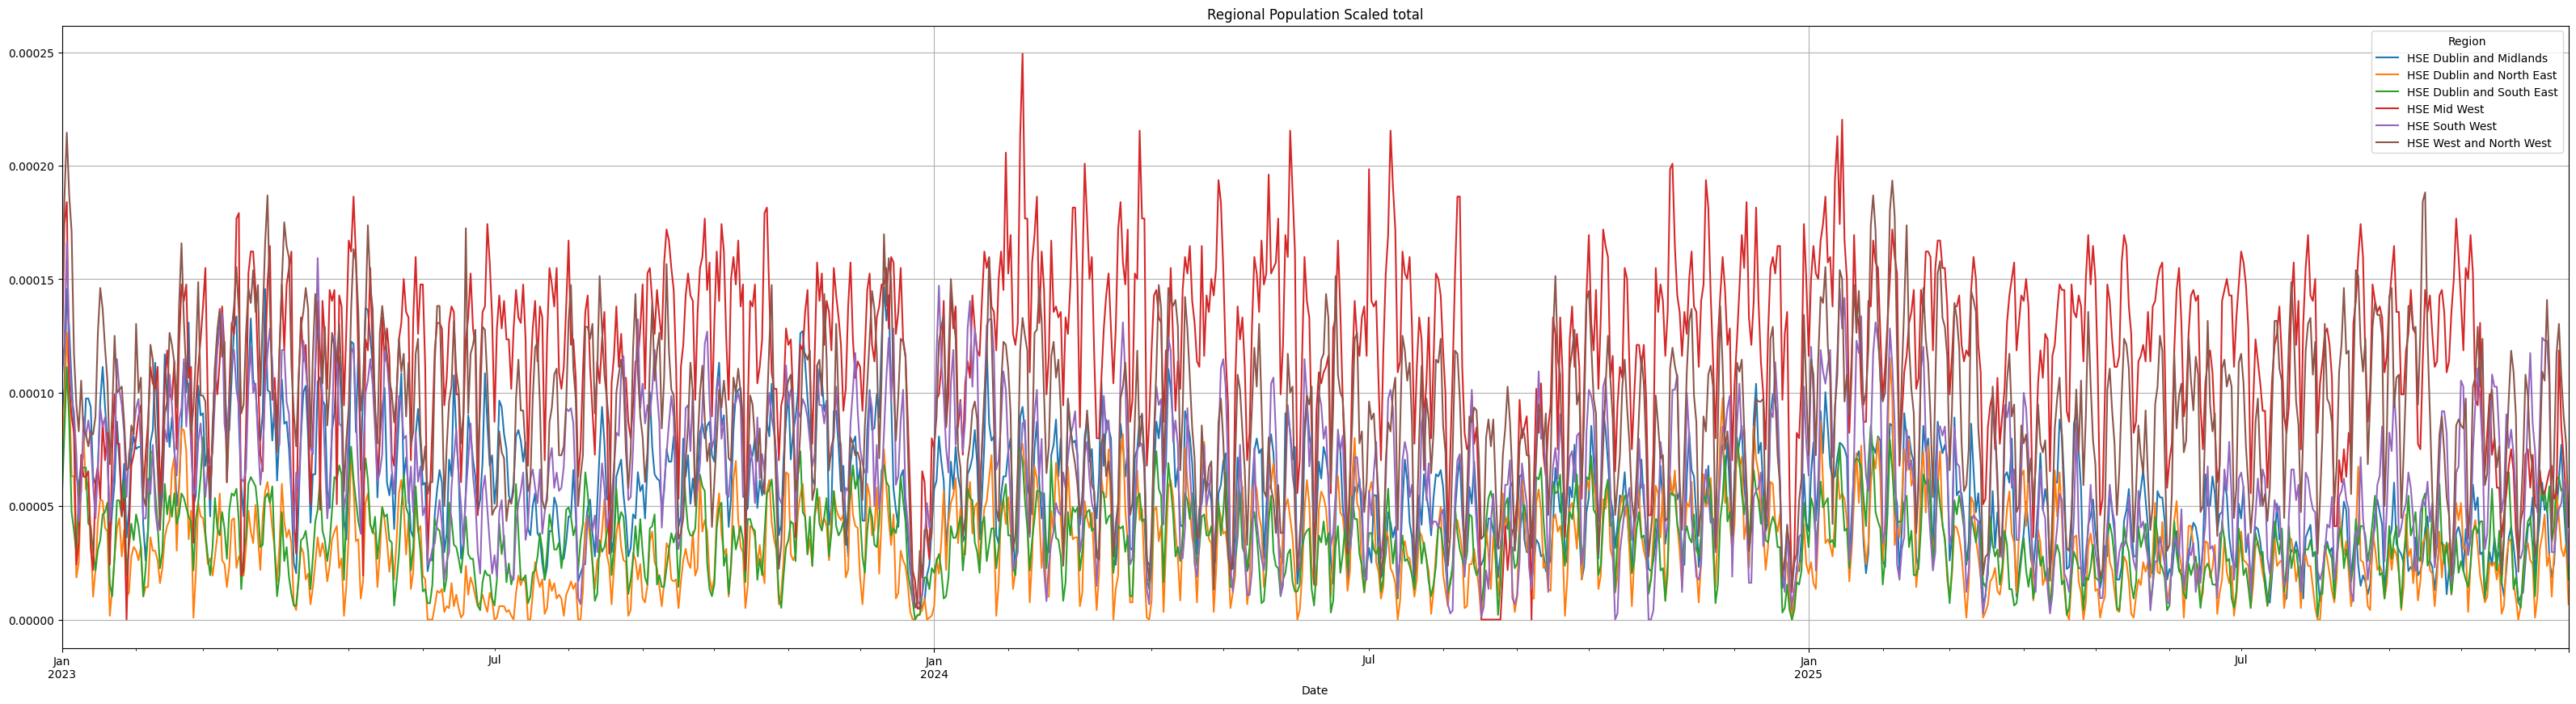

In [ ]:
# Plot with rolling average
region_df.plot(figsize=(100,10), grid=True, legend=True, title="Regional Population Scaled total")

In [123]:
region_df

Region,HSE Dublin and Midlands,HSE Dublin and North East,HSE Dublin and South East,HSE Mid West,HSE South West,HSE West and North West
Date,,,,,,
2023-01-01,0.000090,0.000068,0.000055,0.000116,0.000107,0.000128
2023-01-02,0.000102,0.000095,0.000082,0.000174,0.000122,0.000186
2023-01-03,0.000146,0.000126,0.000111,0.000184,0.000166,0.000215
2023-01-04,0.000128,0.000104,0.000088,0.000104,0.000122,0.000187
2023-01-05,0.000105,0.000063,0.000047,0.000090,0.000097,0.000171
...,...,...,...,...,...,...
2025-11-11,0.000062,0.000045,0.000063,0.000119,0.000049,0.000130
2025-11-12,0.000077,0.000031,0.000057,0.000085,0.000051,0.000107
2025-11-13,0.000051,0.000028,0.000059,0.000070,0.000061,0.000090


## Weekend effects
Plotting mean for each weekday

In [104]:
region_df

Region,HSE Dublin and Midlands,HSE Dublin and North East,HSE Dublin and South East,HSE Mid West,HSE South West,HSE West and North West
Date,,,,,,
2023-01-01,0.000090,0.000068,0.000055,0.000116,0.000107,0.000128
2023-01-02,0.000102,0.000095,0.000082,0.000174,0.000122,0.000186
2023-01-03,0.000146,0.000126,0.000111,0.000184,0.000166,0.000215
2023-01-04,0.000128,0.000104,0.000088,0.000104,0.000122,0.000187
2023-01-05,0.000105,0.000063,0.000047,0.000090,0.000097,0.000171
...,...,...,...,...,...,...
2025-11-11,0.000062,0.000045,0.000063,0.000119,0.000049,0.000130
2025-11-12,0.000077,0.000031,0.000057,0.000085,0.000051,0.000107
2025-11-13,0.000051,0.000028,0.000059,0.000070,0.000061,0.000090


/var/folders/8p/bnwtr4b93fn3_th1x9ysmwy00000gn/T/ipykernel_91825/2294526153.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  region_df.groupby(["weekday"]).mean().plot(figsize=(10,5), grid=True, legend=True, title="Regional totals").set_xticklabels(labels=['',"Mon",'Tues','Wed','Thur','Fri','Sat','Sun'])


[Text(-1.0, 0, ''),
 Text(0.0, 0, 'Mon'),
 Text(1.0, 0, 'Tues'),
 Text(2.0, 0, 'Wed'),
 Text(3.0, 0, 'Thur'),
 Text(4.0, 0, 'Fri'),
 Text(5.0, 0, 'Sat'),
 Text(6.0, 0, 'Sun'),
 Text(7.0, 0, '')]

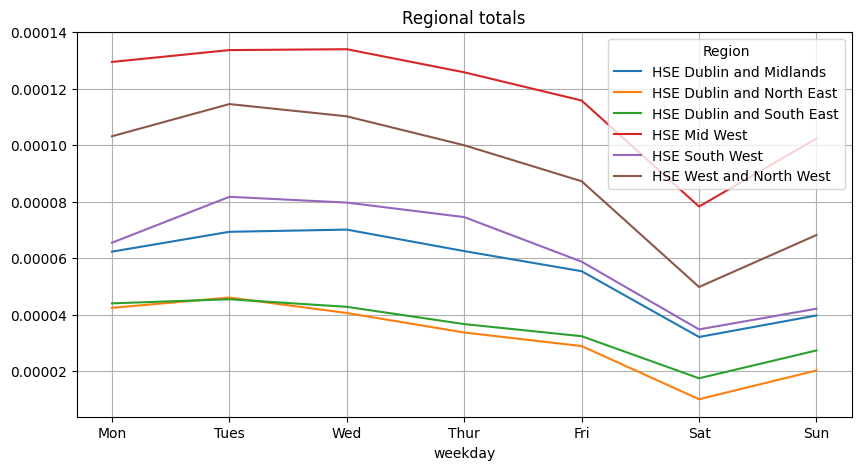

In [105]:
# Add weekdays to df
region_df['weekday']= region_df.index.dayofweek
# Plot
region_df.groupby(["weekday"]).mean().plot(figsize=(10,5), grid=True, legend=True, title="Regional totals").set_xticklabels(labels=['',"Mon",'Tues','Wed','Thur','Fri','Sat','Sun'])

## Autocorrelation 

In [ ]:
from scipy import signal
from scipy.ndimage import uniform_filter1d

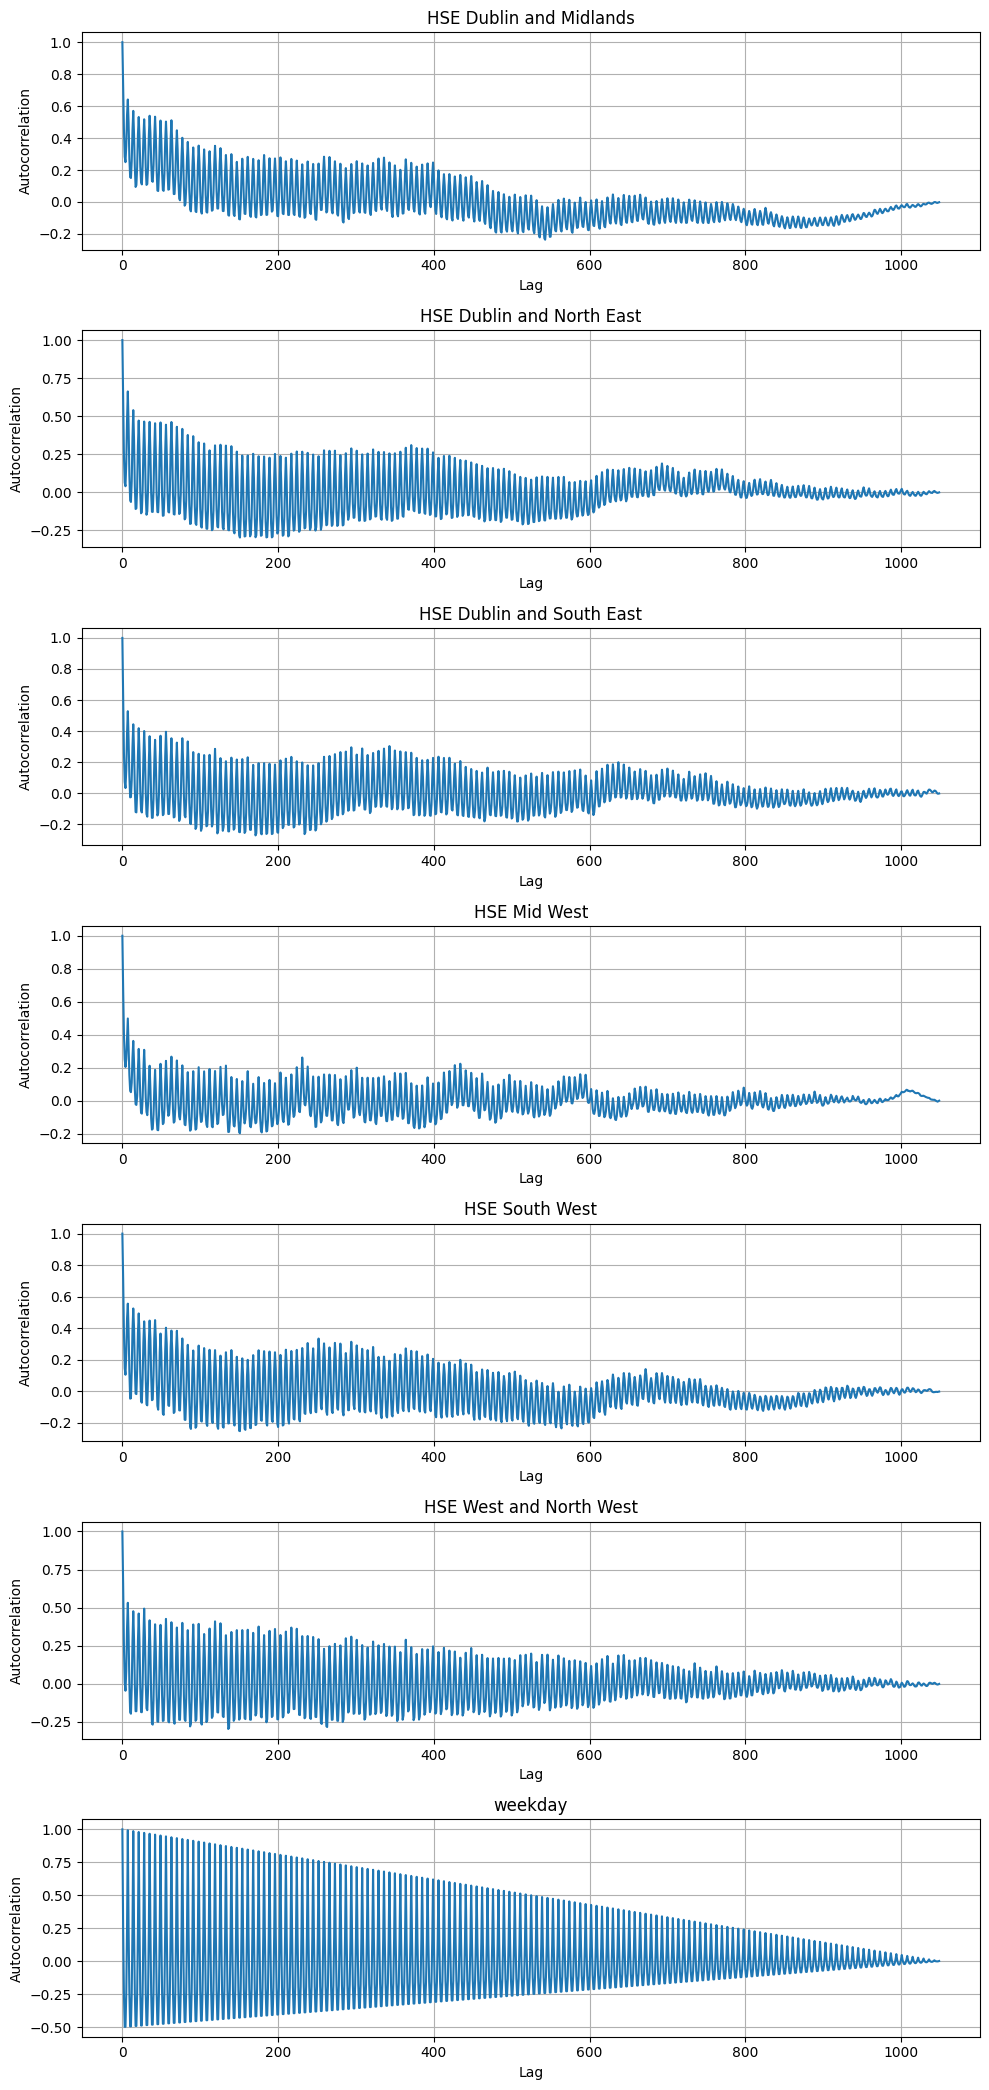

In [108]:
# do autocorr
# each lag is a day so ~50 days is ~2 months

# just to plot every autocorrelation seperatly
numeric_cols = region_df.select_dtypes(include='number').columns
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 3*len(numeric_cols)))

for ax, col in zip(axes, numeric_cols):
    x = region_df[col].dropna().values
    x = x - x.mean()
    # do auto correlation
    acf = signal.correlate(x, x, mode='full')
    # get just positive half (this function will get negative correlations)
    acf = acf[len(acf)//2:]  
    acf = acf / acf[0]       # lag 0 which should be the max
    #print(acf[0], acf.max())

    ax.plot(acf)  # First 50 lags
    # ax.plot(signal.lfilter([alpha], [1, -(1-alpha)], data))  # First 50 lags
    ax.set_title(f'{col}')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelation')
    ax.grid(True)

plt.tight_layout()
plt.show()

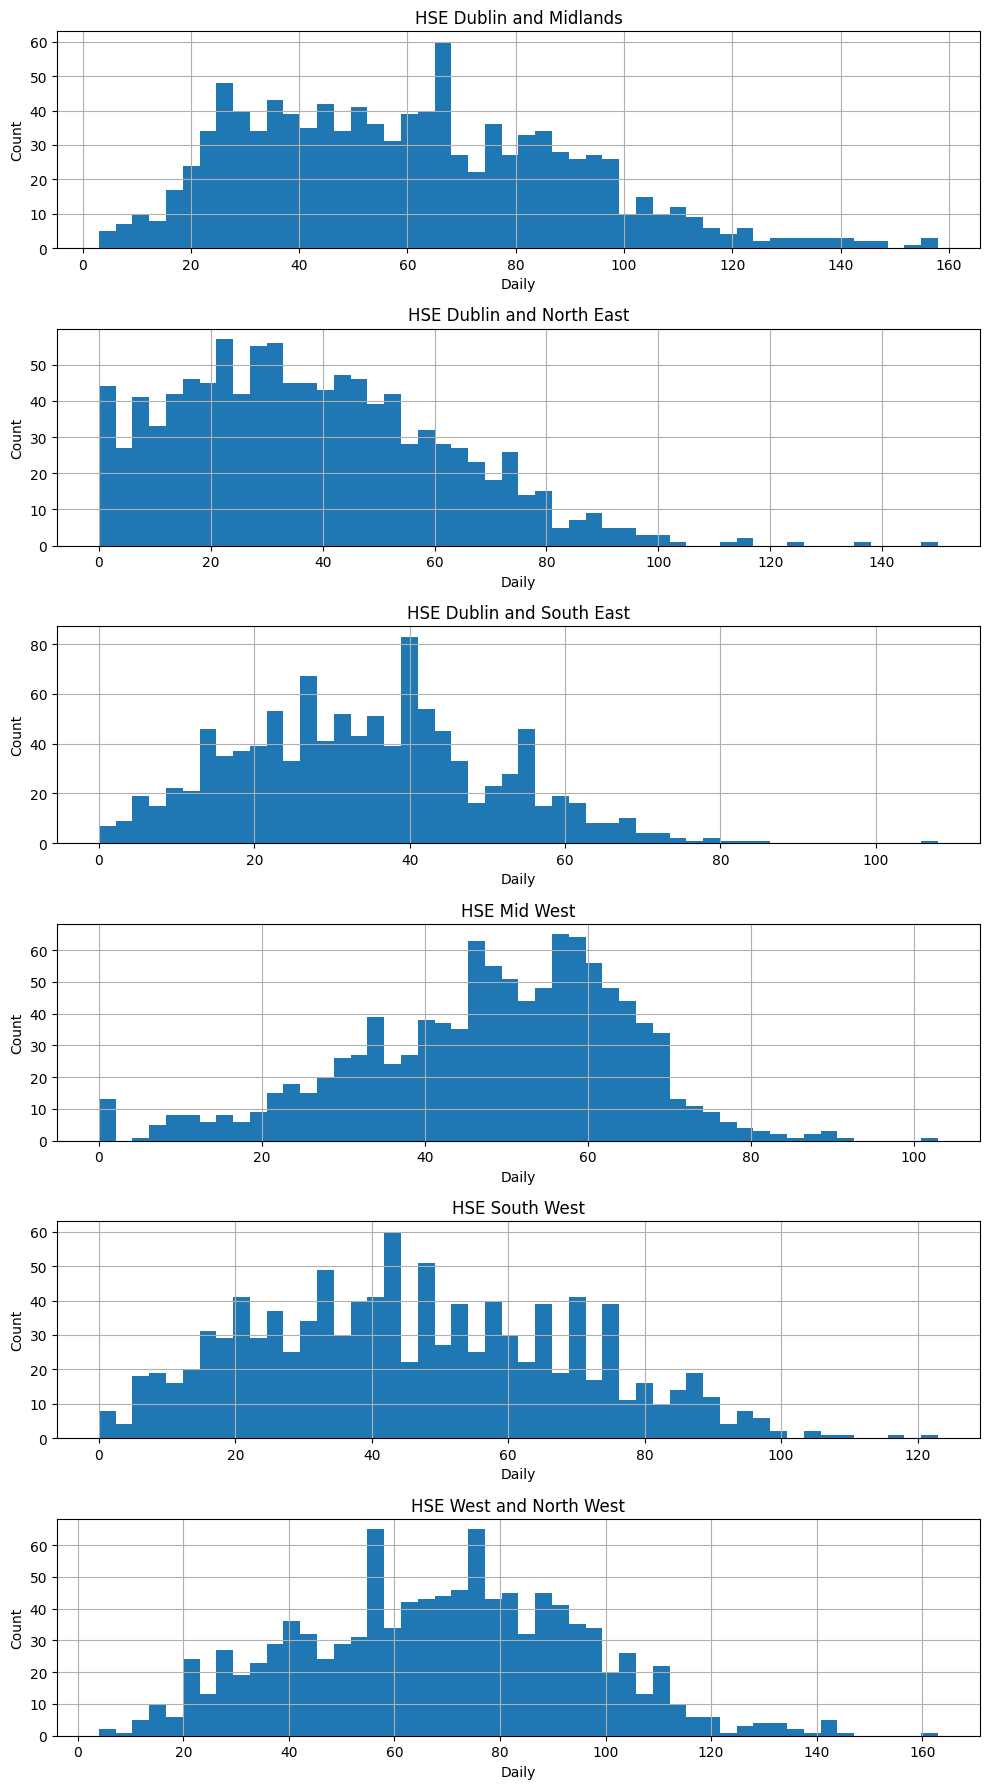

In [149]:
# just to plot every autocorrelation seperatly
numeric_cols = region_df.select_dtypes(include='number').columns
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 3*len(numeric_cols)))

for ax, col in zip(axes, numeric_cols):
    x = region_df[col].dropna().values

    # ax.hist(x, bins=50)  # First 50 lags
    ax.hist(x, bins=50)
    ax.set_title(f'{col}')
    ax.set_xlabel('Daily')
    ax.set_ylabel('Count')
    ax.grid(True)

plt.tight_layout()
plt.show()

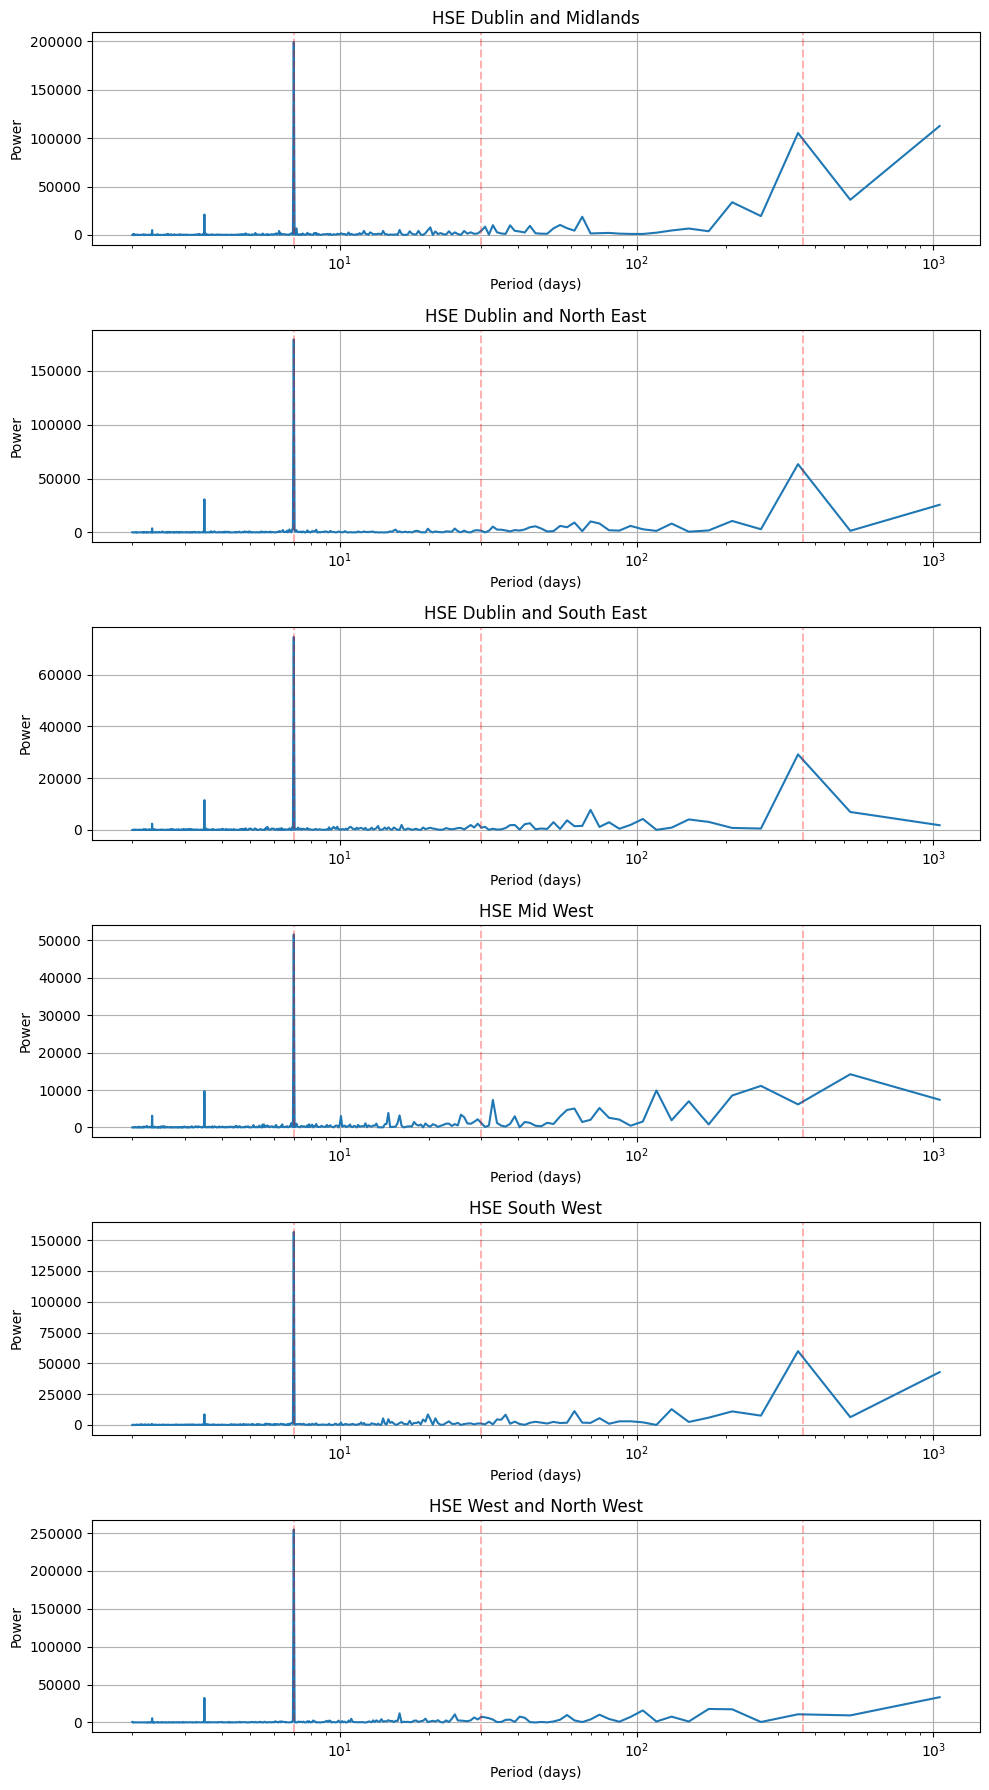

In [160]:
# just to plot every psd
from scipy.signal import welch, periodogram
numeric_cols = region_df.select_dtypes(include='number').columns
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 3*len(numeric_cols)))

fs=1# for daily sampling

for ax, col in zip(axes, numeric_cols):
    x = region_df[col].dropna().values
    x = x - x.mean()

    # Compute PSD
    # freqs, psd = welch(x, fs=fs, nperseg=400)

    freqs, psd = periodogram(x, fs=1.0)

    # Convert to periods (days)
    periods = 1 / freqs[1:]
    psd = psd[1:]

    ax.plot(periods, psd)
    ax.set_title(f'{col}')
    ax.set_xlabel('Period (days)')
    ax.set_ylabel('Power')
    ax.set_xscale('log')
    ax.grid(True)

    # Mark common periods
    for period in [7, 30, 365]:
        if period < periods.max():
            ax.axvline(period, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()